<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Logo_uninorte_colombia.jpg/1200px-Logo_uninorte_colombia.jpg" width=70%></img>

<font size=12>Algoritmos Y Complejidad</font>\
<font size=6>Algoritmos Geneticos: TSP</font>

Héctor Andrés Suárez Camacho - 200162159 \
Fernando Mateo Valencia Gómez - 200166289\
Santiago Carbal Martinez - 200152335\
Santiago Hernández Cadavid - 200153162

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import itertools


#Colombia_TSP 

Explicación de nuestra solución:


1.   Lo primero que hacemos es leer la matriz de distancia del archivo de excel.
2.   Luego obtenemos la lista de las ciudades de la primera fila del archivo.
3.   Después creamos la matriz de distancias para un acceso más fácil.
4.   Luego generamos unas coordenadas aleatorias para representar cada ciudad




In [ ]:
# Leer el archivo de Excel con la matriz de distancias
distances_df = pd.read_excel("colombia.xlsx", sheet_name="colombia")

# Obtener la lista de ciudades desde la primera fila
ciudades = distances_df.columns[:].tolist()

# Crear una matriz de distancias a partir del DataFrame
distances = distances_df.values

# Obtener las coordenadas aleatorias para cada ciudad
coordenadas = []
for _ in range(len(ciudades)):
    latitud = random.uniform(2, 13)  # Rango de latitudes para Colombia
    longitud = random.uniform(-80, -67)  # Rango de longitudes para Colombia
    coordenadas.append((latitud, longitud))



5.   Calculamos el fitness como la suma de todas las distancias por cada solución que se genera.
6. La población inicial para el algoritmo genético. Recibe el número de individuos en la población (num_individuos) y el número de nodos (ciudades) en el grafo (num_nodos). Genera individuos aleatorios, donde cada individuo es una lista de índices de ciudades permutados al azar.
7. Escogemos a las mejores soluciones por su fitness o aptitud, para asegurar que nuestra solución será mejor (para resolver el problema).
8. Luego hacemos el cruce o combinación, pero tomando dos puntos de corte para producir decendencia más variada.
9. La mutación opera intercambiando dos genes de posición, es decir, esocojo dos genes del cromosoma y los cambio de posición. (Se supone que cada cromosoma/solución no repite genes)
10. Retornamos la nueva generación



In [2]:
# Función para evaluar la aptitud (distancia total recorrida)
def evaluar_fitness(solucion):
    total_distance = 0
    for i in range(len(solucion) - 1):
        current_city = solucion[i]
        next_city = solucion[i + 1]
        total_distance += distances[current_city][next_city]
    return total_distance

# Generar población inicial
def generar_poblacion_inicial(num_individuos, num_nodos):
    poblacion = []
    for _ in range(num_individuos):
        individuo = random.sample(range(num_nodos), num_nodos)
        poblacion.append(individuo)
    return poblacion

# Generar la siguiente generación utilizando selección por torneo y operador de cruce de orden
def generar_nueva_generacion(poblacion, num_padres, probabilidad_mutacion):
    nueva_generacion = []
    
    # Realizar torneo para seleccionar padres
    for _ in range(num_padres):
        torneo = random.sample(poblacion, 5)
        mejor_individuo = min(torneo, key=lambda x: evaluar_fitness(x))
        nueva_generacion.append(mejor_individuo)
    
    # Operador de cruce de orden
    while len(nueva_generacion) < len(poblacion):
        padre1 = random.choice(nueva_generacion)
        padre2 = random.choice(nueva_generacion)
        
        punto_corte1 = random.randint(0, len(padre1) - 2)
        punto_corte2 = random.randint(punto_corte1 + 1, len(padre1) - 1)
        
        hijo = [-1] * len(padre1)
        hijo[punto_corte1:punto_corte2 + 1] = padre1[punto_corte1:punto_corte2 + 1]
        
        idx = punto_corte2 + 1
        for i in range(len(padre2)):
            if idx == len(padre2):
                idx = 0
            if padre2[i] not in hijo:
                hijo[idx] = padre2[i]
                idx += 1
        
        nueva_generacion.append(hijo)
    
    # Aplicar mutación
    for individuo in nueva_generacion:
        if random.random() < probabilidad_mutacion:
            idx1, idx2 = random.sample(range(len(individuo)), 2)
            individuo[idx1], individuo[idx2] = individuo[idx2], individuo[idx1]
    
    return nueva_generacion


11. Definimos los parametros del Algoritmo.
12. Luego generamos nuestra población inicial.
13. Luego iteramos tantas veces como generaciones queramos. En cada iteración calculamos el fitness de la población actual, luegos tomamos la solución que menor fitness tenga, debido a que loa distancia total de cada solución es su fitnees, una distancia menor es un menor fitness, y eso es lo que buscamos, que se demore menos. Una vez tengamos los mejores fitness, escogemos una nueva población, es decir, una generación.

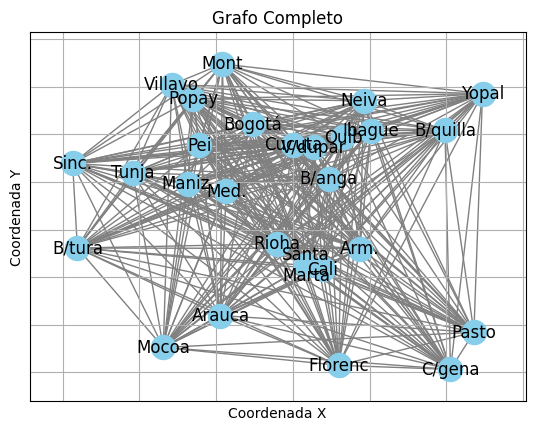

Mejor Recorrido:
Arm. -> Pei -> Med. -> Quib -> Maniz. -> Villavo -> Ibague -> B/tura -> Cali -> Popay -> Florenc -> Neiva -> Pasto -> Mocoa -> Cucuta -> Arauca -> Yopal -> Tunja -> Bogotá -> B/anga -> V/dupar -> Rioha -> Santa
Marta -> B/quilla -> C/gena -> Sinc. -> Mont -> Arm.
Distancia: 7775


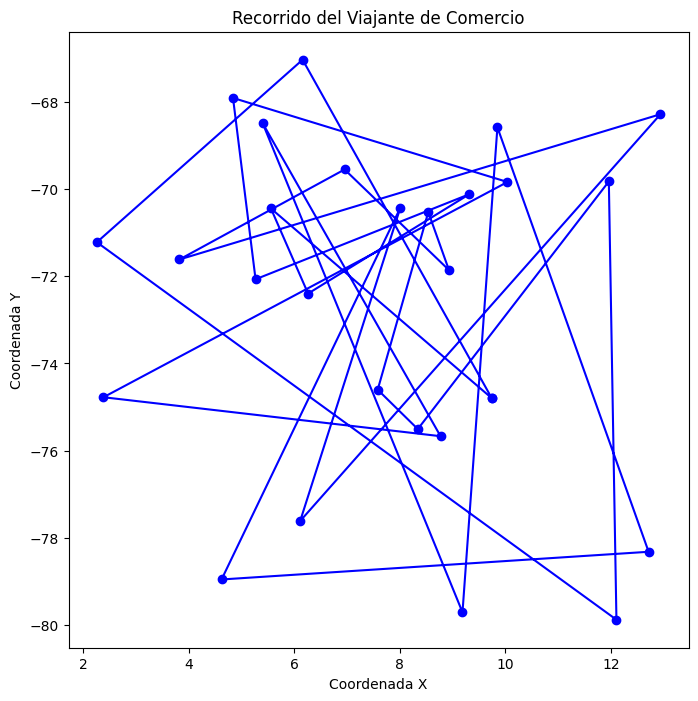

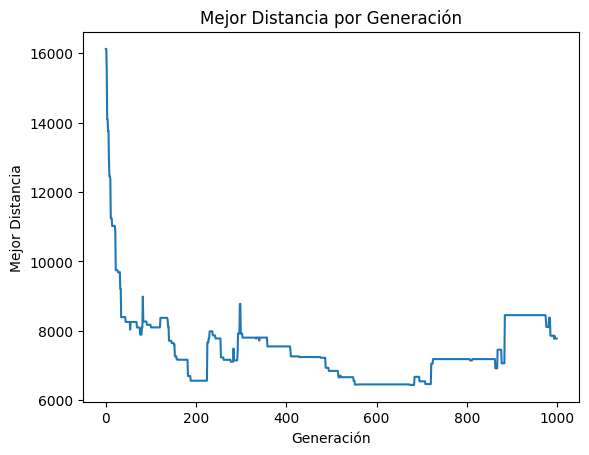

In [5]:
# Parámetros del algoritmo genético
num_generaciones = 1000
num_individuos = 27
num_padres = 10
probabilidad_mutacion = 0.05

# Obtener el número de nodos
num_nodos = len(ciudades)

# Generar población inicial
poblacion = generar_poblacion_inicial(num_individuos, num_nodos)

# Variables para guardar la evolución de la mejor distancia
mejores_distancias = []
mejor_solucion = None

# Ejecutar el algoritmo genético
for i in range(num_generaciones):
    # Calcular la distancia de la población actual
    distancias = [evaluar_fitness(individuo) for individuo in poblacion]
    
    # Encontrar y guardar la mejor solución actual
    mejor_solucion_actual = min(poblacion, key=lambda x: evaluar_fitness(x))
    if mejor_solucion is None or evaluar_fitness(mejor_solucion_actual) < evaluar_fitness(mejor_solucion):
        mejor_solucion = mejor_solucion_actual
    
    # Guardar la mejor distancia de la generación actual
    mejores_distancias.append(evaluar_fitness(mejor_solucion))
    
    # Generar la siguiente generación
    poblacion = generar_nueva_generacion(poblacion, num_padres, probabilidad_mutacion)

# Graficar el grafo completo
grafo = nx.Graph()
for ciudad in ciudades:
    x = coordenadas[ciudades.index(ciudad)][0]
    y = coordenadas[ciudades.index(ciudad)][1]
    grafo.add_node(ciudad, pos=(x, y))

for nodo1, nodo2 in itertools.combinations(ciudades, 2):
    grafo.add_edge(nodo1, nodo2, weight=distances[ciudades.index(nodo1)][ciudades.index(nodo2)])

pos = nx.get_node_attributes(grafo, 'pos')
labels = {nodo: nodo for nodo in grafo.nodes()}
nx.draw_networkx(grafo, pos, labels=labels, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('Grafo Completo')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()

# Imprimir el recorrido del viajante de comercio
print("Mejor Recorrido:")
for i in range(len(mejor_solucion)):
    print(ciudades[mejor_solucion[i]], end=' -> ')
print(ciudades[mejor_solucion[0]])

# Imprimir su distancia
print("Distancia:", evaluar_fitness(mejor_solucion))

# Graficar el recorrido de la mejor solución
mejor_rec = mejor_solucion + [mejor_solucion[0]]  # Cerrar el ciclo
x = [coordenadas[nodo][0] for nodo in mejor_rec]
y = [coordenadas[nodo][1] for nodo in mejor_rec]
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'bo-')
plt.title('Recorrido del Viajante de Comercio')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

# Graficar fitness vs generación
generaciones = range(num_generaciones)
plt.plot(generaciones, mejores_distancias)
plt.title('Mejor Distancia por Generación')
plt.xlabel('Generación')
plt.ylabel('Mejor Distancia')
plt.show()

En la grafica de Mejor distancia vs generación, vemos que con el pasar las generaciones obtenemos recorridos que demoran menos.

#Ciudades_TSP



1.   Primero, como nada más tenemos las coordenadas de las ciudades, lo primero que hay que hacer es hallar las distancias entre todos los nodos. Para eso usamos la formula de la distancia euclidiana

2. Luego, tenemos la función evaluar-fitness donde por cada individuo (es decir, un recorrido) vamos sumando las distancias que hay en el.

3. Para escoger a los padres, hallamos las probabilidades de cada individuo frente a la población actual. Luego se escogen los padres en función de esas probabilidades. Un individuo puede ser seleccionado como padre varias veces.

4. En la función recombinar, se esocoge un punto de corte por parejas de padres y luego se combinan las partes de los padres para formar a los hijos.

5. La mutación funciona intercambiando la posición de dos genes de cada individuo.

6. La función generar_nueva_decendencia, combina las funciones anteriores para generar una nueva generación de individuos.

7. La función encontrar_mejor_solución lo que hace es buscar al individuo con menor distancia total de recorrido.



In [6]:
def distancia_euclidiana(nodo1, nodo2, coordenadas):
    x1, y1 = coordenadas[nodo1 * 2], coordenadas[nodo1 * 2 + 1]
    x2, y2 = coordenadas[nodo2 * 2], coordenadas[nodo2 * 2 + 1]
    distancia = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distancia

def evaluar_fitness(individuo, coordenadas):
    distancia = 0
    for i in range(len(individuo) - 1):
        nodo_actual = individuo[i]
        nodo_siguiente = individuo[i + 1]
        distancia += distancia_euclidiana(nodo_actual, nodo_siguiente, coordenadas)
    return distancia

def seleccionar_padres(poblacion, num_padres):
    padres = []
    fitness_total = sum(evaluar_fitness(individuo, coordenadas) for individuo in poblacion)
    probabilidades = [evaluar_fitness(individuo, coordenadas) / fitness_total for individuo in poblacion]
    for _ in range(num_padres):
        padre = random.choices(poblacion, weights=probabilidades)[0]
        padres.append(padre)
    return padres

def recombinar(padre1, padre2):
    punto_corte = random.randint(0, len(padre1) - 1)
    hijo1 = padre1[:punto_corte] + [nodo for nodo in padre2 if nodo not in padre1[:punto_corte]]
    hijo2 = padre2[:punto_corte] + [nodo for nodo in padre1 if nodo not in padre2[:punto_corte]]
    return hijo1, hijo2

def mutar(individuo, probabilidad_mutacion):
    if random.random() < probabilidad_mutacion:
        i, j = random.sample(range(len(individuo)), 2)
        individuo[i], individuo[j] = individuo[j], individuo[i]
    return individuo

def generar_nueva_generacion(poblacion, num_padres, probabilidad_mutacion, coordenadas):
    padres = seleccionar_padres(poblacion, num_padres)
    descendencia = []
    while len(descendencia) < len(poblacion):
        padre1, padre2 = random.sample(padres, 2)
        hijo1, hijo2 = recombinar(padre1, padre2)
        hijo1 = mutar(hijo1, probabilidad_mutacion)
        hijo2 = mutar(hijo2, probabilidad_mutacion)
        descendencia.extend([hijo1, hijo2])
    return descendencia[:len(poblacion)]

def encontrar_mejor_solucion(poblacion, coordenadas):
    mejor_distancia = float('inf')
    mejor_solucion = None
    for individuo in poblacion:
        distancia = evaluar_fitness(individuo, coordenadas)
        if distancia < mejor_distancia:
            mejor_distancia = distancia
            mejor_solucion = individuo
    return mejor_solucion

def leer_coordenadas(nombre_archivo):
    coordenadas = []
    with open(nombre_archivo, 'r') as archivo:
        lineas = archivo.readlines()
        for linea in lineas:
            coordenada = int(linea.strip())
            coordenadas.append(coordenada)
    return coordenadas

8. En primer lugar, se utiliza la función generar_poblacion_inicial para generar una población inicial de individuos. Cada individuo es una lista de nodos que representa un posible recorrido del viajante de comercio. Se generan num_individuos individuos de manera aleatoria utilizando la función random.sample para garantizar que no haya nodos repetidos en cada individuo.

9. Luego, se ejecuta el algoritmo genético en un bucle for que itera num_generaciones veces. En cada iteración, se calcula la distancia de cada individuo en la población actual utilizando la función evaluar_fitness, que suma las distancias entre nodos consecutivos en el recorrido. También se encuentra y guarda la mejor solución actual utilizando la función encontrar_mejor_solucion.

10. A continuación, se genera la siguiente generación de individuos utilizando la función generar_nueva_generacion. En esta función, se seleccionan los padres mediante el método de selección proporcional al fitness, se realiza la recombinación y la mutación para generar la descendencia.

11. Una vez finalizadas las iteraciones del bucle, se tienen los resultados finales. Se grafica el grafo completo que representa todas las ciudades, y se muestra el recorrido de la mejor solución encontrada en forma de grafo. También se calcula y muestra la distancia total de la mejor solución, así como el recorrido en forma de lista.

##Para 100 ciudades


In [16]:
# Leer coordenadas desde archivo
coordenadas = leer_coordenadas('map_city100.tsp')

# Parámetros del algoritmo genético
num_nodos = len(coordenadas) // 2
num_individuos = 100
num_generaciones = 10
num_padres = 100
probabilidad_mutacion = 0.1

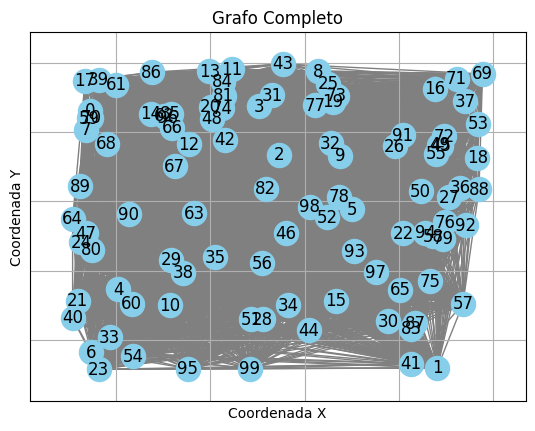

Distancia: 42848773.03109943
Mejor recorrido:
94 -> 88 -> 12 -> 19 -> 96 -> 3 -> 23 -> 31 -> 64 -> 87 -> 33 -> 82 -> 56 -> 73 -> 69 -> 65 -> 66 -> 89 -> 44 -> 22 -> 32 -> 8 -> 27 -> 78 -> 42 -> 26 -> 98 -> 18 -> 84 -> 7 -> 34 -> 35 -> 90 -> 6 -> 72 -> 53 -> 17 -> 9 -> 81 -> 20 -> 2 -> 4 -> 62 -> 1 -> 41 -> 60 -> 80 -> 83 -> 15 -> 97 -> 54 -> 51 -> 40 -> 11 -> 59 -> 46 -> 99 -> 28 -> 71 -> 67 -> 74 -> 47 -> 61 -> 25 -> 39 -> 91 -> 50 -> 21 -> 30 -> 29 -> 68 -> 14 -> 85 -> 10 -> 70 -> 45 -> 86 -> 55 -> 38 -> 95 -> 77 -> 52 -> 75 -> 57 -> 76 -> 49 -> 58 -> 79 -> 92 -> 43 -> 16 -> 24 -> 5 -> 36 -> 37 -> 63 -> 48 -> 13 -> 0 -> 93 -> 94


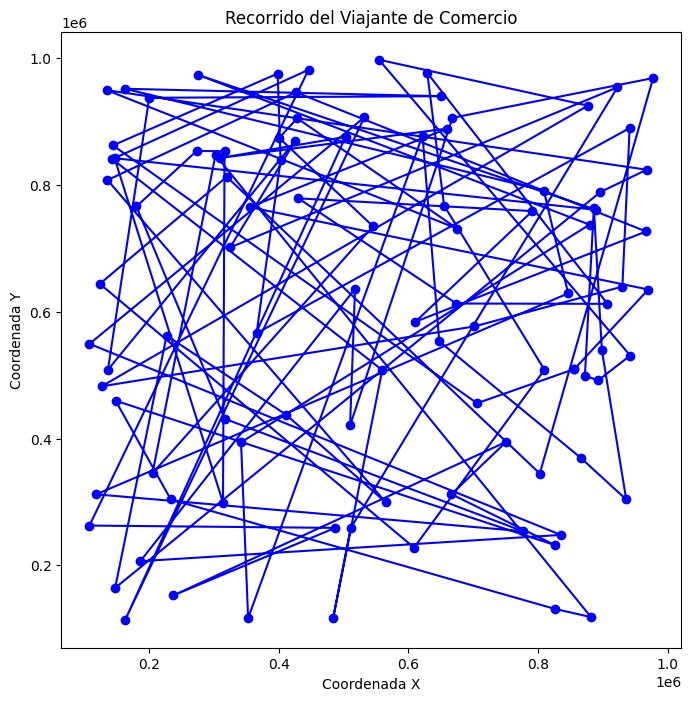

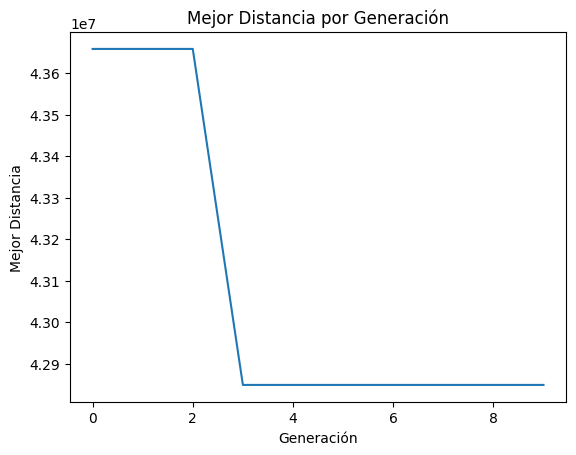

In [17]:
# Generar población inicial
def generar_poblacion_inicial(num_individuos, num_nodos):
    poblacion = []
    for _ in range(num_individuos):
        individuo = random.sample(range(num_nodos), num_nodos)
        poblacion.append(individuo)
    return poblacion

poblacion = generar_poblacion_inicial(num_individuos, num_nodos)

# Variables para guardar la evolución de la mejor distancia
mejores_distancias = []
mejor_solucion = None

# Ejecutar el algoritmo genético
for i in range(num_generaciones):
    # Calcular la distancia de la población actual
    distancias = [evaluar_fitness(individuo, coordenadas) for individuo in poblacion]
    
    # Encontrar y guardar la mejor solución actual
    mejor_solucion_actual = encontrar_mejor_solucion(poblacion, coordenadas)
    if mejor_solucion is None or evaluar_fitness(mejor_solucion_actual, coordenadas) < evaluar_fitness(mejor_solucion, coordenadas):
        mejor_solucion = mejor_solucion_actual
    
    # Guardar la mejor distancia de la generación actual
    mejores_distancias.append(evaluar_fitness(mejor_solucion, coordenadas))
    
    # Generar la siguiente generación
    poblacion = generar_nueva_generacion(poblacion, num_padres, probabilidad_mutacion, coordenadas)

# Graficar el grafo completo
grafo = nx.Graph()
for i in range(num_nodos):
    x = coordenadas[i * 2]
    y = coordenadas[i * 2 + 1]
    grafo.add_node(i, pos=(x, y))

for nodo1, nodo2 in itertools.combinations(range(num_nodos), 2):
    grafo.add_edge(nodo1, nodo2, weight=distancia_euclidiana(nodo1, nodo2, coordenadas))

pos = nx.get_node_attributes(grafo, 'pos')
labels = {nodo: str(nodo) for nodo in grafo.nodes()}
nx.draw_networkx(grafo, pos, labels=labels, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('Grafo Completo')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()

# Calcular y mostrar la aptitud de la solución final
print("Distancia:", evaluar_fitness(mejor_solucion, coordenadas))
# Mostrar el recorrido en consola
print("Mejor recorrido:")
for nodo in mejor_solucion:
    print(nodo, end=' -> ')
print(mejor_solucion[0])

# Graficar el recorrido de la mejor solución
mejor_rec = mejor_solucion + [mejor_solucion[0]]  # Cerrar el ciclo
x = [coordenadas[nodo * 2] for nodo in mejor_rec]
y = [coordenadas[nodo * 2 + 1] for nodo in mejor_rec]
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'bo-')
plt.title('Recorrido del Viajante de Comercio')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

# Graficar fitness vs generación
generaciones = range(num_generaciones)
plt.plot(generaciones, mejores_distancias)
plt.title('Mejor Distancia por Generación')
plt.xlabel('Generación')
plt.ylabel('Mejor Distancia')
plt.show()

##Para 400 ciudades


In [7]:
# Leer coordenadas desde archivo
coordenadas = leer_coordenadas('map_city400.tsp')

# Parámetros del algoritmo genético
num_nodos = len(coordenadas) // 2
num_individuos = 400
num_generaciones = 10
num_padres = 100
probabilidad_mutacion = 0.1

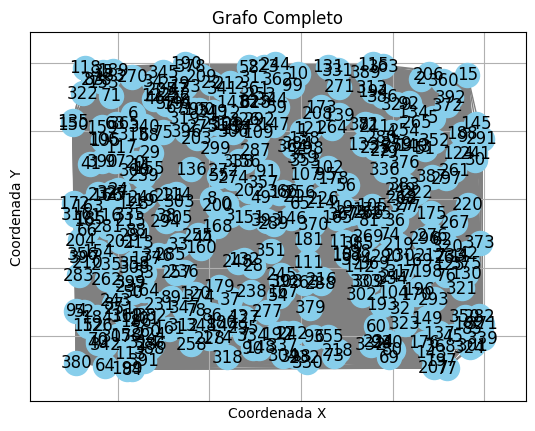

Distancia: 173170026.30336547
Mejor recorrido:
10 -> 139 -> 82 -> 351 -> 167 -> 193 -> 122 -> 70 -> 116 -> 41 -> 378 -> 371 -> 171 -> 115 -> 123 -> 346 -> 249 -> 200 -> 159 -> 331 -> 42 -> 77 -> 354 -> 336 -> 277 -> 366 -> 109 -> 16 -> 357 -> 244 -> 264 -> 160 -> 108 -> 56 -> 359 -> 344 -> 188 -> 71 -> 148 -> 2 -> 96 -> 265 -> 124 -> 257 -> 163 -> 316 -> 358 -> 233 -> 260 -> 164 -> 137 -> 248 -> 301 -> 296 -> 68 -> 325 -> 274 -> 105 -> 218 -> 339 -> 396 -> 261 -> 134 -> 365 -> 291 -> 238 -> 37 -> 143 -> 269 -> 36 -> 135 -> 100 -> 150 -> 136 -> 157 -> 118 -> 368 -> 230 -> 380 -> 88 -> 307 -> 81 -> 298 -> 50 -> 6 -> 138 -> 323 -> 272 -> 283 -> 111 -> 8 -> 32 -> 259 -> 279 -> 361 -> 25 -> 315 -> 197 -> 343 -> 309 -> 89 -> 194 -> 34 -> 97 -> 1 -> 44 -> 112 -> 156 -> 74 -> 241 -> 180 -> 33 -> 145 -> 168 -> 217 -> 373 -> 276 -> 328 -> 254 -> 11 -> 84 -> 332 -> 300 -> 83 -> 161 -> 258 -> 57 -> 38 -> 311 -> 153 -> 282 -> 213 -> 242 -> 350 -> 221 -> 208 -> 229 -> 13 -> 313 -> 387 -> 35 -> 75 ->

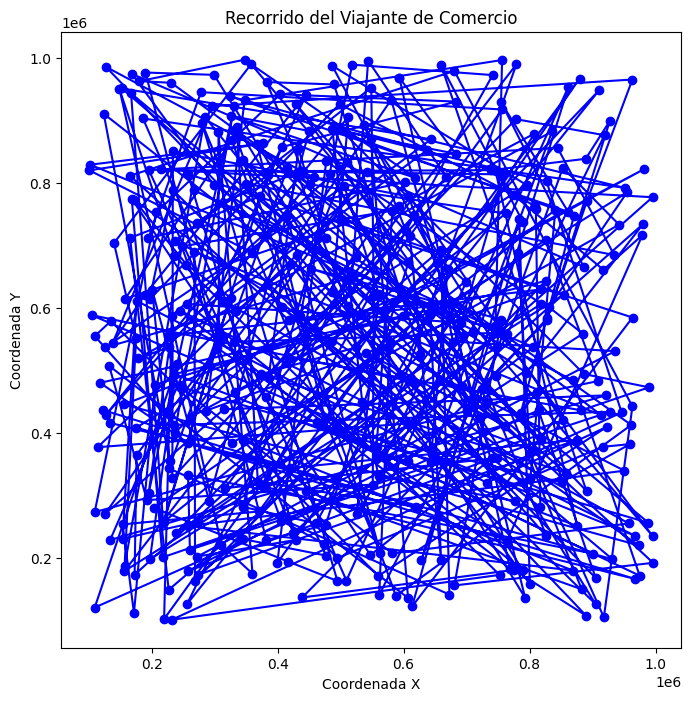

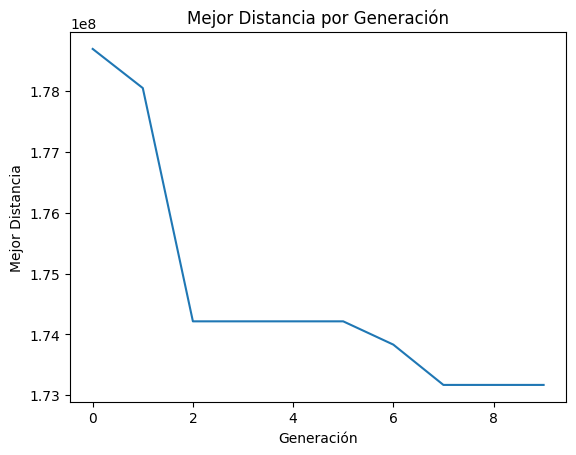

In [9]:
# Generar población inicial
def generar_poblacion_inicial(num_individuos, num_nodos):
    poblacion = []
    for _ in range(num_individuos):
        individuo = random.sample(range(num_nodos), num_nodos)
        poblacion.append(individuo)
    return poblacion

poblacion = generar_poblacion_inicial(num_individuos, num_nodos)

# Variables para guardar la evolución de la mejor distancia
mejores_distancias = []
mejor_solucion = None

# Ejecutar el algoritmo genético
for i in range(num_generaciones):
    # Calcular la distancia de la población actual
    distancias = [evaluar_fitness(individuo, coordenadas) for individuo in poblacion]
    
    # Encontrar y guardar la mejor solución actual
    mejor_solucion_actual = encontrar_mejor_solucion(poblacion, coordenadas)
    if mejor_solucion is None or evaluar_fitness(mejor_solucion_actual, coordenadas) < evaluar_fitness(mejor_solucion, coordenadas):
        mejor_solucion = mejor_solucion_actual
    
    # Guardar la mejor distancia de la generación actual
    mejores_distancias.append(evaluar_fitness(mejor_solucion, coordenadas))
    
    # Generar la siguiente generación
    poblacion = generar_nueva_generacion(poblacion, num_padres, probabilidad_mutacion, coordenadas)

# Graficar el grafo completo
grafo = nx.Graph()
for i in range(num_nodos):
    x = coordenadas[i * 2]
    y = coordenadas[i * 2 + 1]
    grafo.add_node(i, pos=(x, y))

for nodo1, nodo2 in itertools.combinations(range(num_nodos), 2):
    grafo.add_edge(nodo1, nodo2, weight=distancia_euclidiana(nodo1, nodo2, coordenadas))

pos = nx.get_node_attributes(grafo, 'pos')
labels = {nodo: str(nodo) for nodo in grafo.nodes()}
nx.draw_networkx(grafo, pos, labels=labels, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('Grafo Completo')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()


# Calcular y mostrar la aptitud de la solución final
print("Distancia:", evaluar_fitness(mejor_solucion, coordenadas))
# Mostrar el recorrido en consola
print("Mejor recorrido:")
for nodo in mejor_solucion:
    print(nodo, end=' -> ')
print(mejor_solucion[0])

# Graficar el recorrido de la mejor solución
mejor_rec = mejor_solucion + [mejor_solucion[0]]  # Cerrar el ciclo
x = [coordenadas[nodo * 2] for nodo in mejor_rec]
y = [coordenadas[nodo * 2 + 1] for nodo in mejor_rec]
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'bo-')
plt.title('Recorrido del Viajante de Comercio')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

# Graficar fitness vs generación
generaciones = range(num_generaciones)
plt.plot(generaciones, mejores_distancias)
plt.title('Mejor Distancia por Generación')
plt.xlabel('Generación')
plt.ylabel('Mejor Distancia')
plt.show()

##Para 724 ciudades


In [10]:
# Leer coordenadas desde archivo
coordenadas = leer_coordenadas('map_city724.tsp')

# Parámetros del algoritmo genético
num_nodos = len(coordenadas) // 2
num_individuos = 724
num_generaciones = 100
num_padres = 362
probabilidad_mutacion = 0.1

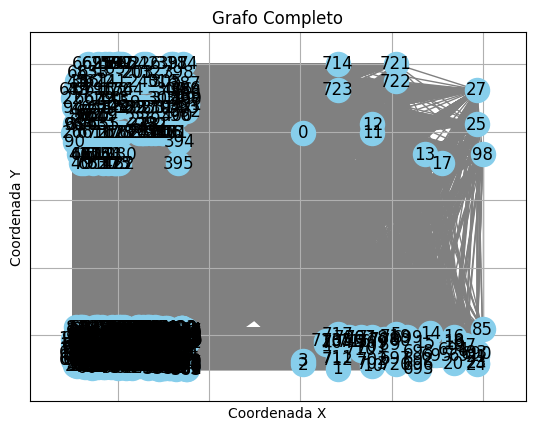

Distancia: 238657105.08390513
Mejor recorrido:
624 -> 450 -> 605 -> 696 -> 639 -> 377 -> 125 -> 80 -> 69 -> 320 -> 595 -> 511 -> 245 -> 200 -> 58 -> 637 -> 314 -> 681 -> 361 -> 609 -> 336 -> 274 -> 601 -> 626 -> 406 -> 714 -> 444 -> 348 -> 485 -> 484 -> 165 -> 91 -> 319 -> 40 -> 461 -> 220 -> 112 -> 365 -> 93 -> 102 -> 83 -> 261 -> 462 -> 341 -> 211 -> 398 -> 381 -> 141 -> 411 -> 360 -> 384 -> 196 -> 647 -> 262 -> 524 -> 665 -> 675 -> 687 -> 573 -> 198 -> 520 -> 222 -> 6 -> 157 -> 52 -> 410 -> 318 -> 679 -> 85 -> 213 -> 684 -> 89 -> 615 -> 19 -> 562 -> 359 -> 229 -> 207 -> 447 -> 304 -> 621 -> 67 -> 242 -> 34 -> 280 -> 691 -> 529 -> 422 -> 73 -> 15 -> 285 -> 258 -> 436 -> 449 -> 385 -> 645 -> 405 -> 494 -> 489 -> 500 -> 269 -> 338 -> 81 -> 100 -> 302 -> 21 -> 465 -> 471 -> 403 -> 28 -> 24 -> 331 -> 10 -> 412 -> 475 -> 634 -> 391 -> 556 -> 396 -> 279 -> 374 -> 317 -> 693 -> 283 -> 9 -> 414 -> 549 -> 589 -> 326 -> 325 -> 701 -> 217 -> 350 -> 655 -> 2 -> 278 -> 50 -> 694 -> 672 -> 598 -> 

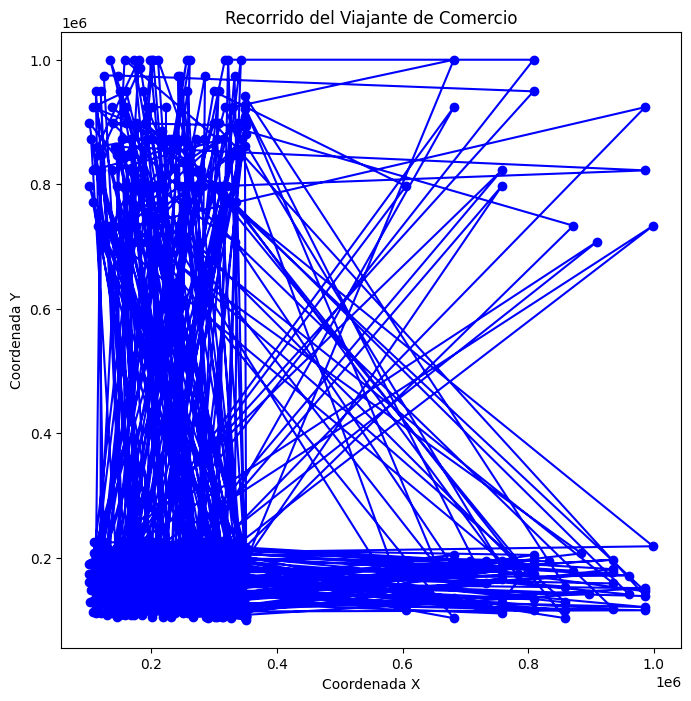

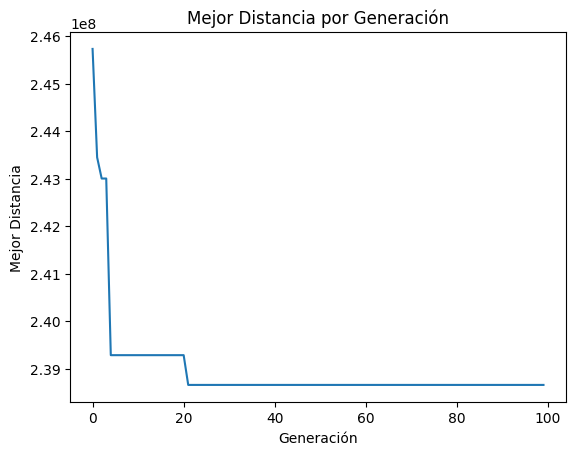

In [11]:
# Generar población inicial
def generar_poblacion_inicial(num_individuos, num_nodos):
    poblacion = []
    for _ in range(num_individuos):
        individuo = random.sample(range(num_nodos), num_nodos)
        poblacion.append(individuo)
    return poblacion

poblacion = generar_poblacion_inicial(num_individuos, num_nodos)

# Variables para guardar la evolución de la mejor distancia
mejores_distancias = []
mejor_solucion = None

# Ejecutar el algoritmo genético
for i in range(num_generaciones):
    # Calcular la distancia de la población actual
    distancias = [evaluar_fitness(individuo, coordenadas) for individuo in poblacion]
    
    # Encontrar y guardar la mejor solución actual
    mejor_solucion_actual = encontrar_mejor_solucion(poblacion, coordenadas)
    if mejor_solucion is None or evaluar_fitness(mejor_solucion_actual, coordenadas) < evaluar_fitness(mejor_solucion, coordenadas):
        mejor_solucion = mejor_solucion_actual
    
    # Guardar la mejor distancia de la generación actual
    mejores_distancias.append(evaluar_fitness(mejor_solucion, coordenadas))
    
    # Generar la siguiente generación
    poblacion = generar_nueva_generacion(poblacion, num_padres, probabilidad_mutacion, coordenadas)

# Graficar el grafo completo
grafo = nx.Graph()
for i in range(num_nodos):
    x = coordenadas[i * 2]
    y = coordenadas[i * 2 + 1]
    grafo.add_node(i, pos=(x, y))

for nodo1, nodo2 in itertools.combinations(range(num_nodos), 2):
    grafo.add_edge(nodo1, nodo2, weight=distancia_euclidiana(nodo1, nodo2, coordenadas))

pos = nx.get_node_attributes(grafo, 'pos')
labels = {nodo: str(nodo) for nodo in grafo.nodes()}
nx.draw_networkx(grafo, pos, labels=labels, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('Grafo Completo')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()

# Calcular y mostrar la aptitud de la solución final
print("Distancia:", evaluar_fitness(mejor_solucion, coordenadas))
# Mostrar el recorrido en consola
print("Mejor recorrido:")
for nodo in mejor_solucion:
    print(nodo, end=' -> ')
print(mejor_solucion[0])

# Graficar el recorrido de la mejor solución
mejor_rec = mejor_solucion + [mejor_solucion[0]]  # Cerrar el ciclo
x = [coordenadas[nodo * 2] for nodo in mejor_rec]
y = [coordenadas[nodo * 2 + 1] for nodo in mejor_rec]
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'bo-')
plt.title('Recorrido del Viajante de Comercio')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

# Graficar fitness vs generación
generaciones = range(num_generaciones)
plt.plot(generaciones, mejores_distancias)
plt.title('Mejor Distancia por Generación')
plt.xlabel('Generación')
plt.ylabel('Mejor Distancia')
plt.show()

##Para 1173 ciudades


In [14]:
# Leer coordenadas desde archivo
coordenadas = leer_coordenadas('map_city1173.tsp')

# Parámetros del algoritmo genético
num_nodos = len(coordenadas) // 2
num_individuos = 1173
num_generaciones = 10
num_padres = 293
probabilidad_mutacion = 0.1

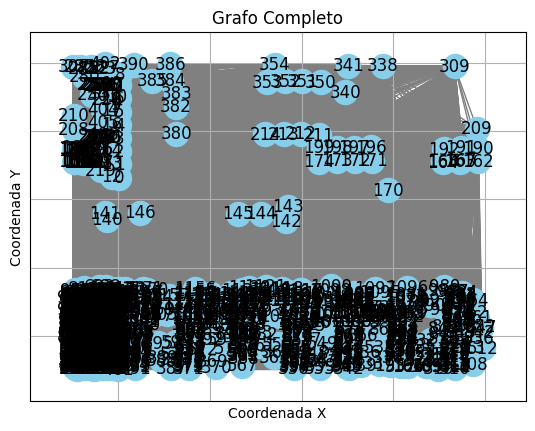

Distancia: 4262316.809845955
Mejor recorrido:
757 -> 146 -> 625 -> 581 -> 813 -> 438 -> 712 -> 111 -> 313 -> 182 -> 364 -> 630 -> 289 -> 35 -> 1064 -> 306 -> 125 -> 767 -> 387 -> 670 -> 424 -> 941 -> 904 -> 122 -> 840 -> 148 -> 737 -> 1123 -> 589 -> 1085 -> 685 -> 457 -> 287 -> 805 -> 565 -> 706 -> 1121 -> 1113 -> 725 -> 937 -> 687 -> 580 -> 1127 -> 914 -> 583 -> 618 -> 28 -> 197 -> 1096 -> 326 -> 636 -> 3 -> 383 -> 488 -> 181 -> 407 -> 719 -> 609 -> 441 -> 439 -> 87 -> 558 -> 828 -> 1009 -> 423 -> 945 -> 596 -> 208 -> 1060 -> 529 -> 246 -> 307 -> 1025 -> 539 -> 984 -> 790 -> 500 -> 905 -> 66 -> 1112 -> 152 -> 1067 -> 1132 -> 614 -> 556 -> 1027 -> 1010 -> 1008 -> 859 -> 832 -> 1023 -> 467 -> 576 -> 649 -> 769 -> 982 -> 657 -> 665 -> 90 -> 729 -> 427 -> 935 -> 401 -> 162 -> 702 -> 722 -> 1042 -> 758 -> 27 -> 548 -> 571 -> 591 -> 161 -> 482 -> 1076 -> 24 -> 901 -> 305 -> 403 -> 807 -> 108 -> 668 -> 1144 -> 887 -> 622 -> 1045 -> 234 -> 672 -> 123 -> 8 -> 75 -> 1166 -> 358 -> 339 -> 560 ->

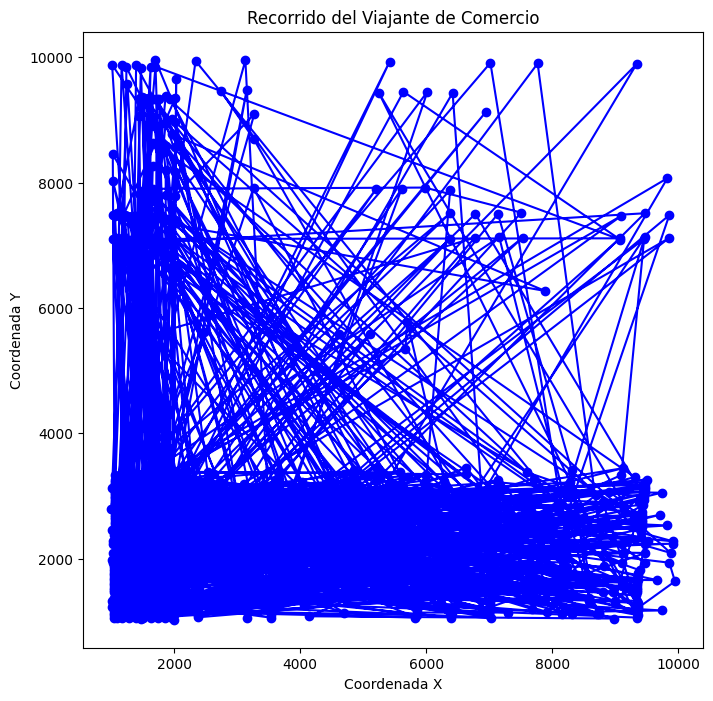

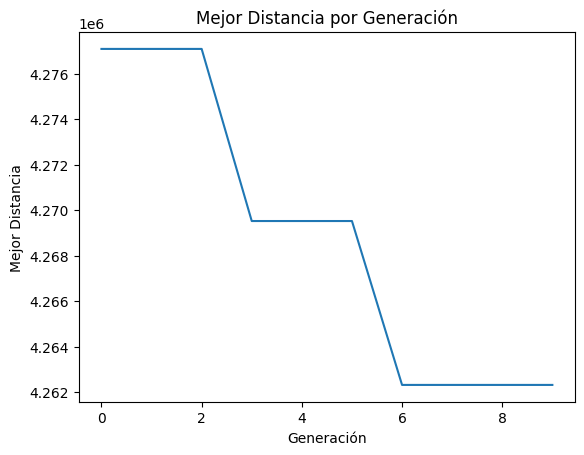

In [15]:
# Generar población inicial
def generar_poblacion_inicial(num_individuos, num_nodos):
    poblacion = []
    for _ in range(num_individuos):
        individuo = random.sample(range(num_nodos), num_nodos)
        poblacion.append(individuo)
    return poblacion

poblacion = generar_poblacion_inicial(num_individuos, num_nodos)

# Variables para guardar la evolución de la mejor distancia
mejores_distancias = []
mejor_solucion = None

# Ejecutar el algoritmo genético
for i in range(num_generaciones):
    # Calcular la distancia de la población actual
    distancias = [evaluar_fitness(individuo, coordenadas) for individuo in poblacion]
    
    # Encontrar y guardar la mejor solución actual
    mejor_solucion_actual = encontrar_mejor_solucion(poblacion, coordenadas)
    if mejor_solucion is None or evaluar_fitness(mejor_solucion_actual, coordenadas) < evaluar_fitness(mejor_solucion, coordenadas):
        mejor_solucion = mejor_solucion_actual
    
    # Guardar la mejor distancia de la generación actual
    mejores_distancias.append(evaluar_fitness(mejor_solucion, coordenadas))
    
    # Generar la siguiente generación
    poblacion = generar_nueva_generacion(poblacion, num_padres, probabilidad_mutacion, coordenadas)

# Graficar el grafo completo
grafo = nx.Graph()
for i in range(num_nodos):
    x = coordenadas[i * 2]
    y = coordenadas[i * 2 + 1]
    grafo.add_node(i, pos=(x, y))

for nodo1, nodo2 in itertools.combinations(range(num_nodos), 2):
    grafo.add_edge(nodo1, nodo2, weight=distancia_euclidiana(nodo1, nodo2, coordenadas))

pos = nx.get_node_attributes(grafo, 'pos')
labels = {nodo: str(nodo) for nodo in grafo.nodes()}
nx.draw_networkx(grafo, pos, labels=labels, with_labels=True, node_color='skyblue', edge_color='gray')
plt.title('Grafo Completo')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.grid(True)
plt.show()

# Calcular y mostrar la aptitud de la solución final
print("Distancia:", evaluar_fitness(mejor_solucion, coordenadas))
# Mostrar el recorrido en consola
print("Mejor recorrido:")
for nodo in mejor_solucion:
    print(nodo, end=' -> ')
print(mejor_solucion[0])

# Graficar el recorrido de la mejor solución
mejor_rec = mejor_solucion + [mejor_solucion[0]]  # Cerrar el ciclo
x = [coordenadas[nodo * 2] for nodo in mejor_rec]
y = [coordenadas[nodo * 2 + 1] for nodo in mejor_rec]
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'bo-')
plt.title('Recorrido del Viajante de Comercio')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.show()

# Graficar fitness vs generación
generaciones = range(num_generaciones)
plt.plot(generaciones, mejores_distancias)
plt.title('Mejor Distancia por Generación')
plt.xlabel('Generación')
plt.ylabel('Mejor Distancia')
plt.show()